# NPCC Cost

In [1]:
from tqdm import tqdm

import numpy as np
import pandas as pd

import andes
import ams

import datetime

import matplotlib
import matplotlib.pyplot as plt
import scienceplots

In [2]:
matplotlib.rcdefaults()

In [3]:
%matplotlib

Using matplotlib backend: <object object at 0x10fa93620>


In [4]:
%matplotlib inline

In [5]:
print("Last run time:", datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

print(f'andes:{andes.__version__}')
print(f'ams:{ams.__version__}')

Last run time: 2024-04-12 23:12:05
andes:1.9.1.post38+g2a24a171
ams:0.9.5.post25+g738d558


In [6]:
andes.config_logger(stream_level=50)
ams.config_logger(stream_level=20)

In [7]:
ams_file = './data/npcc_uced_base.xlsx'

sp = ams.load(ams_file,
              setup=True, no_output=True, default_config=True,)

Parsing input file "./data/npcc_uced_base.xlsx"...
Input file parsed in 0.1926 seconds.
Zero line rates detacted in rate_b, rate_c, adjusted to 999.
System set up in 0.0027 seconds.


In [8]:
l1 = 0.97 * sp.config.mva * sp.PQ.p0.v.sum()
l2 = 1.05 * sp.config.mva * sp.PQ.p0.v.sum()

In [9]:
# load the saved data
pgc = pd.read_csv('./res/pg.csv', index_col=0)
pgc *= sp.config.mva

# hard coded
gen_vsg = ['PV_21', 'PV_23', 'PV_25', 'PV_26']
n_vsg = len(gen_vsg)

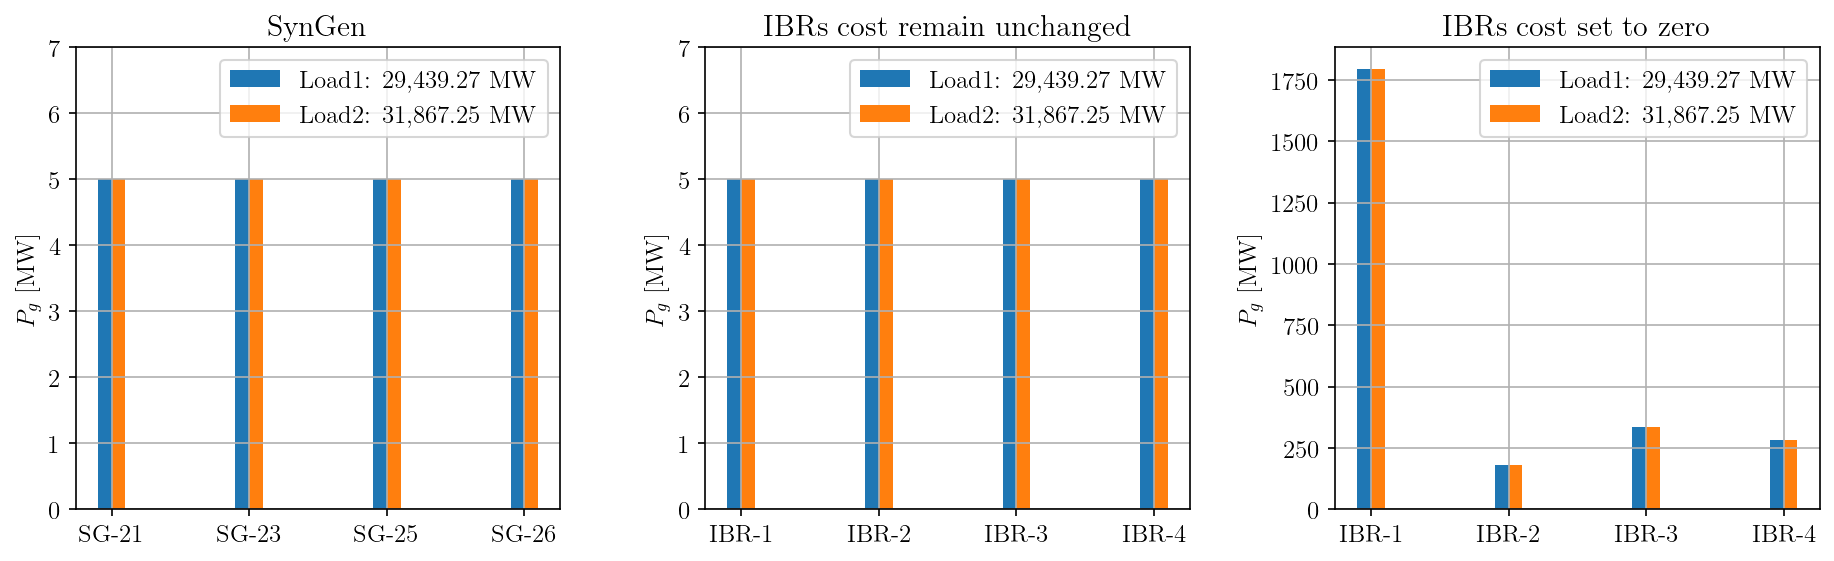

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4), dpi=150)
plt.subplots_adjust(wspace=0.3)

gen_vsg = ['PV_21', 'PV_23', 'PV_25', 'PV_26']
gen_names = ['IBR-1', 'IBR-2', 'IBR-3', 'IBR-4']
sg_names = ['SG-21', 'SG-23', 'SG-25', 'SG-26']
gen_names_mix = [f'{ibr}/{sg}' for ibr, sg in zip(gen_names, sg_names)]

pgmax = sp.StaticGen.get(src='pmax', attr='v', idx=gen_vsg)

n_vsg = len(gen_vsg)

pg97ibr = pgc.loc[gen_vsg, '97IBR'].values
pg97ibri = pgc.loc[gen_vsg, '97IBRI'].values
pg105ibr = pgc.loc[gen_vsg, '105IBR'].values
pg105ibri = pgc.loc[gen_vsg, '105IBRI'].values

xpos = np.arange(n_vsg)

barw = 0.1
xpos1 = xpos - 0.5*barw
xpos2 = xpos + 0.5*barw

label1, label2 = f'Load1: {l1.round(2):,} MW', f'Load2: {l2.round(2):,} MW'
ax[0].bar(xpos1, pg97ibri,
          width=barw, color='tab:blue', label=label1)
ax[0].bar(xpos2, pg105ibri,
          width=barw, color='tab:orange', label=label2)
ax[0].set_ylim(0, 7)
ax[0].set_title('SynGen')
ax[0].set_xticks(xpos)
ax[0].set_xticklabels(sg_names, rotation=0)

ax[1].bar(xpos1, pg97ibri,
          width=barw, color='tab:blue', label=label1)
ax[1].bar(xpos2, pg97ibri,
          width=barw, color='tab:orange', label=label2)
ax[1].set_ylim(0, 7)
ax[1].set_title('IBRs cost remain unchanged')
ax[1].set_xticks(xpos)
ax[1].set_xticklabels(gen_names, rotation=0)

ax[2].bar(xpos1, pg97ibr,
          width=barw, color='tab:blue', label=label1)
ax[2].bar(xpos2, pg105ibr,
          width=barw, color='tab:orange', label=label2)
ax[2].set_title('IBRs cost set to zero')
ax[2].set_xticks(xpos)
ax[2].set_xticklabels(gen_names, rotation=0)

for ax in ax:
    ax.legend()
    ax.grid(True)
    ax.set_ylabel('$P_g$ [MW]')

In [11]:
sasg1 = andes.run('./data/npcc_base.xlsx',
                  setup=True, no_output=True, default_config=True,)
sasg1.TDS.config.no_tqdm = True
sasg1.TDS.run(from_csv='./res/npcc_base_97_out.csv')

sasg2 = andes.run('./data/npcc_base.xlsx',
                  setup=True, no_output=True, default_config=True,)
sasg2.TDS.config.no_tqdm = True
sasg2.TDS.run(from_csv='./res/npcc_base_105_out.csv')

saibri1 = andes.run('./data/npcc_ibr.xlsx',
                    setup=True, no_output=True, default_config=True,)
saibri1.TDS.config.no_tqdm = True
saibri1.TDS.run(from_csv='./res/npcc_ibri_97_out.csv')

saibri2 = andes.run('./data/npcc_ibr.xlsx',
                    setup=True, no_output=True, default_config=True,)
saibri2.TDS.config.no_tqdm = True
saibri2.TDS.run(from_csv='./res/npcc_ibri_105_out.csv')

saibr1 = andes.run('./data/npcc_ibr.xlsx',
                   setup=True, no_output=True, default_config=True,)
saibr1.TDS.config.no_tqdm = True
saibr1.TDS.run(from_csv='./res/npcc_ibr_97_out.csv')

saibr2 = andes.run('./data/npcc_ibr.xlsx',
                   setup=True, no_output=True, default_config=True,)
saibr2.TDS.config.no_tqdm = True
saibr2.TDS.run(from_csv='./res/npcc_ibr_105_out.csv')

-> Single process finished in 0.3198 seconds.
-> Single process finished in 0.2654 seconds.
-> Single process finished in 0.2675 seconds.
-> Single process finished in 0.2022 seconds.
-> Single process finished in 0.2826 seconds.
-> Single process finished in 0.2049 seconds.


True

(<Figure size 2250x1500 with 6 Axes>,
 <Axes: title={'center': 'Case 3, Load: 31,867.25 MW'}, xlabel='Time [s]', ylabel='Generator Freq. [Hz]'>)

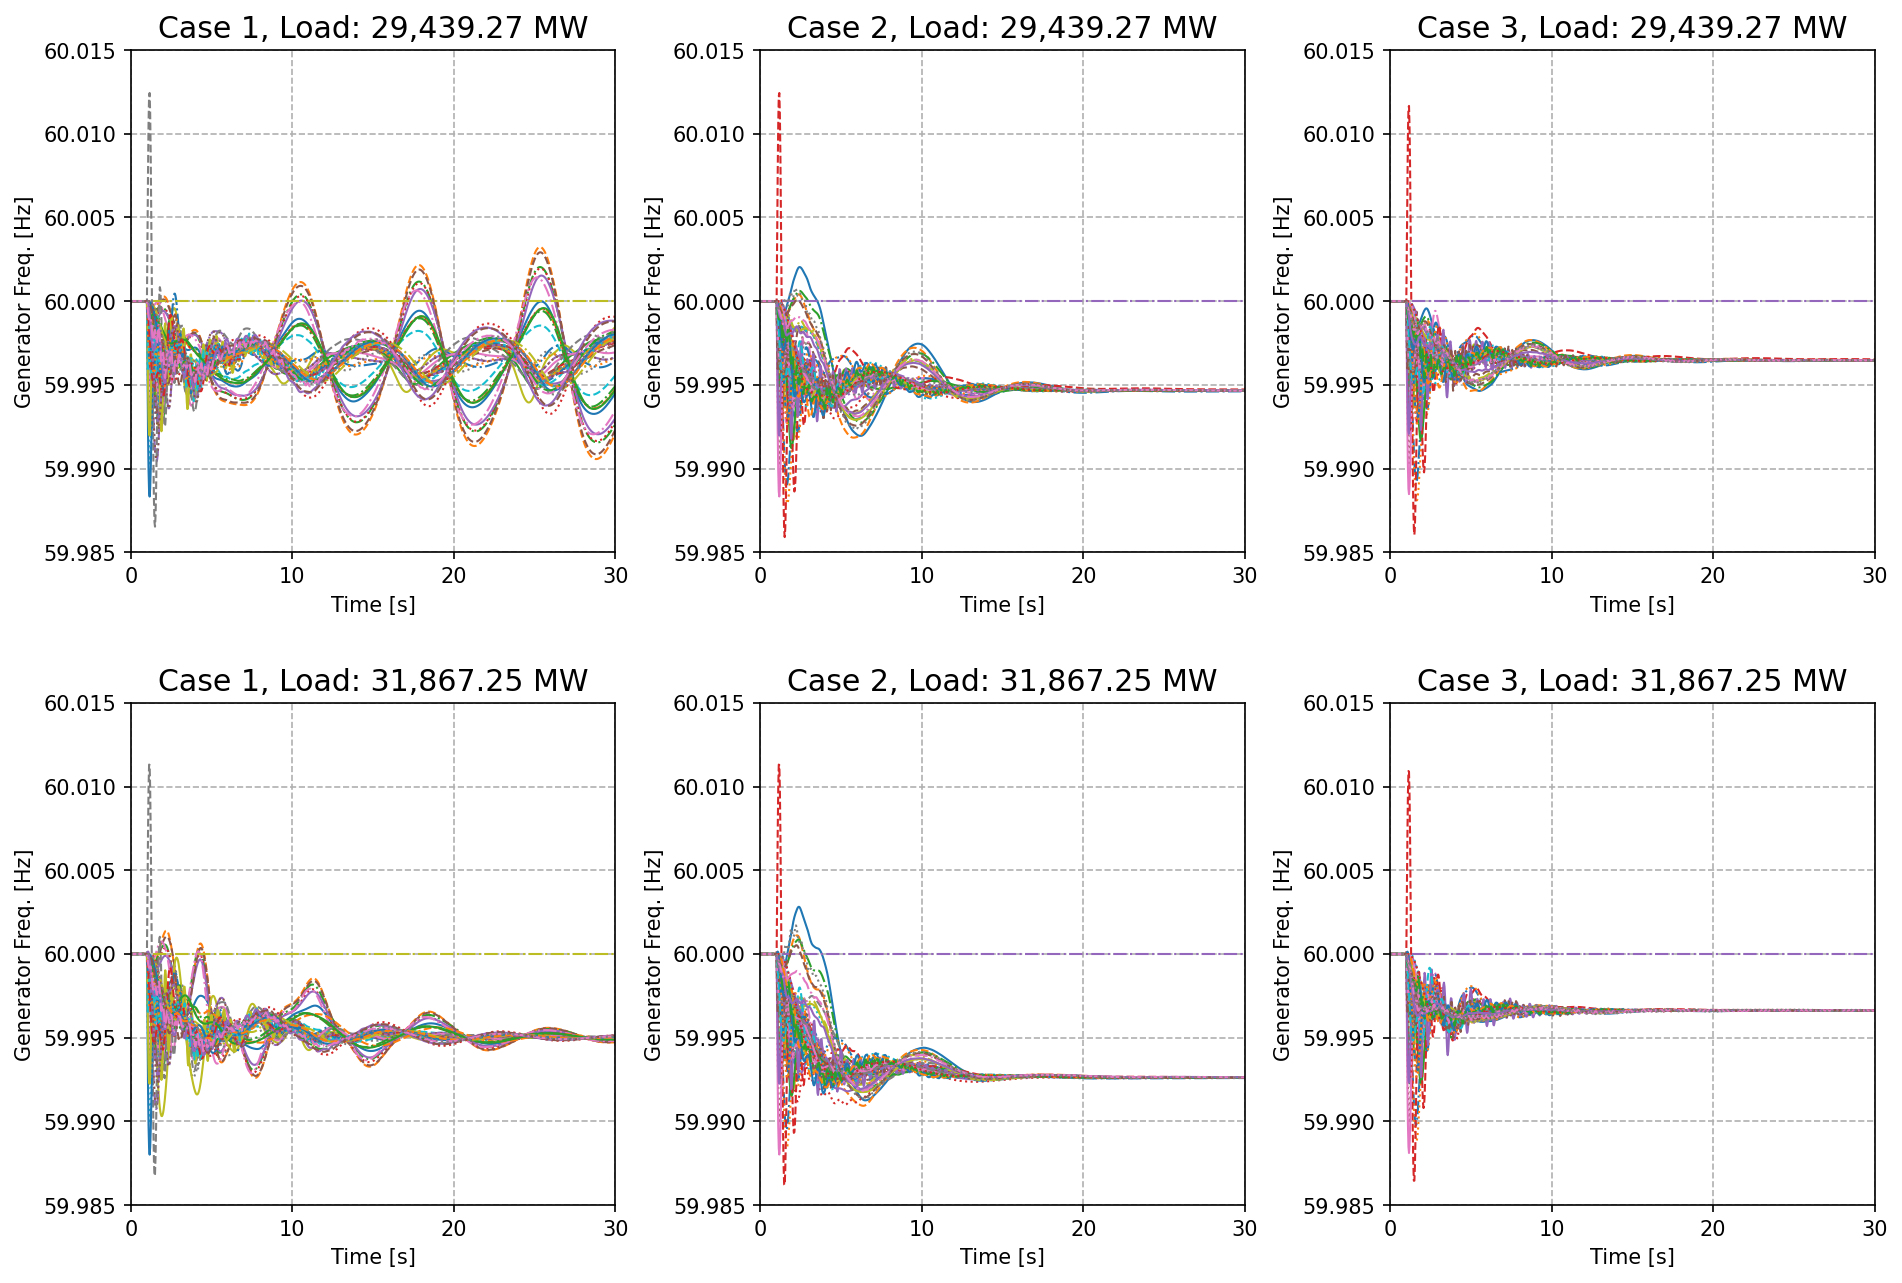

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), dpi=150)
plt.subplots_adjust(hspace=0.3, wspace=0.3)

right = 30
fmin, fmax = 59.985, 60.015

sasg1.TDS.plt.plot([sasg1.GENROU.omega, sasg1.GENCLS.omega],
                   ytimes=sasg1.config.freq, ylabel='Generator Freq. [Hz]',
                   ymin=fmin, ymax=fmax,
                   grid=True, right=right, fig=fig, ax=ax[0, 0],
                   show=False,
                   title=f'Case 1, Load: {l1.round(2):,} MW')
sasg2.TDS.plt.plot([sasg2.GENROU.omega, sasg2.GENCLS.omega],
                   ytimes=sasg2.config.freq, ylabel='Generator Freq. [Hz]',
                   ymin=fmin, ymax=fmax,
                   grid=True, right=right, fig=fig, ax=ax[1, 0],
                   show=False,
                   title=f'Case 1, Load: {l2.round(2):,} MW')

saibri1.TDS.plt.plot([saibri1.GENROU.omega, saibri1.GENCLS.omega, saibri1.REGCV1.omega],
                     ytimes=saibri1.config.freq, ylabel='Generator Freq. [Hz]',
                     ymin=fmin, ymax=fmax,
                     grid=True, right=right, fig=fig, ax=ax[0, 1],
                     show=False,
                     title=f'Case 2, Load: {l1.round(2):,} MW')
saibri2.TDS.plt.plot([saibri2.GENROU.omega, saibri2.GENCLS.omega, saibri2.REGCV1.omega],
                     ytimes=saibri2.config.freq, ylabel='Generator Freq. [Hz]',
                     ymin=fmin, ymax=fmax,
                     grid=True, right=right, fig=fig, ax=ax[1, 1],
                     show=False,
                     title=f'Case 2, Load: {l2.round(2):,} MW')

saibr1.TDS.plt.plot([saibr1.GENROU.omega, saibr1.GENCLS.omega, saibr1.REGCV1.omega],
                    ytimes=saibr1.config.freq, ylabel='Generator Freq. [Hz]',
                    ymin=fmin, ymax=fmax,
                    grid=True, right=right, fig=fig, ax=ax[0, 2],
                    show=False,
                    title=f'Case 3, Load: {l1.round(2):,} MW')
saibr2.TDS.plt.plot([saibr2.GENROU.omega, saibr2.GENCLS.omega, saibr2.REGCV1.omega],
                    ytimes=saibr2.config.freq, ylabel='Generator Freq. [Hz]',
                    ymin=fmin, ymax=fmax,
                    grid=True, right=right, fig=fig, ax=ax[1, 2],
                    show=False,
                    title=f'Case 3, Load: {l2.round(2):,} MW')